## Observations and Insights 

##### 1. While Capomulin appears to the focus of the company, Ramicane may also be worth looking into based on the box and whisker chart and the summary statistics.  The mean tumor size on both of these drugs is very close and lower than the others.  They also show the same standard deviation indicating that they are very close statistically.

##### 2. The focus on much of the analysis was on average tumor volume or volume at the end.  It would be good to get a picture of the change in tumor volume as that would take into account any anomolies in size at the beginning of the trial.

##### 3. The tumor volume and weight had a strong correlation.  You could assume that this is because larger tumors weigh more and thus cause the mice to weigh more.  It could also indicate that the heavier mice do not respond as well to the Capomulin (since that was the drug analyzed for that scatter plot).  More analysis by looking at the line plots of tumor volume on the heavier mice would be necessary to rule this out.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_results = pd.merge(study_results, mouse_metadata,
                                 how='left', on='Mouse ID')

# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint',])]
duplicateMice["Mouse ID"]


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMice = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint',], keep=False)]
duplicateMice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results[mouse_results["Mouse ID"] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_results['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#find unique drug names to initiate dataframe
drugs = clean_mouse_results['Drug Regimen'].unique()
groupby_clean_mouse_results = pd.DataFrame({'Drug Regimen' : drugs})

#find Mean per drug and merge into datafram
drug_mean = clean_mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
drug_mean = drug_mean.rename(columns={'Tumor Volume (mm3)':'mean'})
groupby_clean_mouse_results = pd.merge(groupby_clean_mouse_results, drug_mean,how='inner', on='Drug Regimen')

#find median per drug and merge into datafram
drug_median = clean_mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
drug_median = drug_median.rename(columns={'Tumor Volume (mm3)':'median'})
groupby_clean_mouse_results = pd.merge(groupby_clean_mouse_results, drug_median,how='inner', on='Drug Regimen')

#find var per drug and merge into datafram
drug_var = clean_mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
drug_var = drug_var.rename(columns={'Tumor Volume (mm3)':'var'})
groupby_clean_mouse_results = pd.merge(groupby_clean_mouse_results, drug_var,how='inner', on='Drug Regimen')

#find std per drug and merge into datafram
drug_std = clean_mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
drug_std = drug_std.rename(columns={'Tumor Volume (mm3)':'std'})
groupby_clean_mouse_results = pd.merge(groupby_clean_mouse_results, drug_std,how='inner', on='Drug Regimen')

#find sem per drug and merge into datafram
drug_sem = clean_mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
drug_sem = drug_sem.rename(columns={'Tumor Volume (mm3)':'sem'})
groupby_clean_mouse_results = pd.merge(groupby_clean_mouse_results, drug_sem,how='inner', on='Drug Regimen')

groupby_clean_mouse_results

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
2,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
3,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
4,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
5,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
6,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
7,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
8,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
9,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_clean_mouse_results=clean_mouse_results.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
agg_clean_mouse_results

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

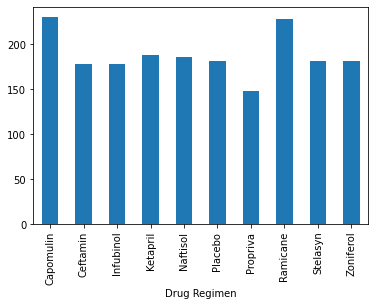

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_mouse_results[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen").count()

bar_plot.plot.bar(legend=False)


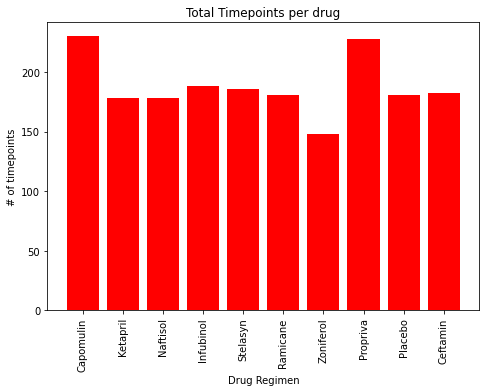

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
timepoints = bar_plot["Timepoint"]
ax.bar(drugs,timepoints, color = 'r')


plt.title("Total Timepoints per drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of timepoints")
plt.xticks(rotation=90)

plt.show()

<AxesSubplot:ylabel='Mouse ID'>

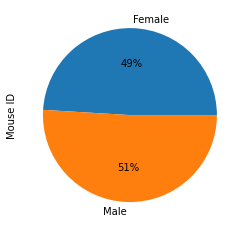

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_mouse_results[['Sex','Mouse ID']].groupby("Sex").count()
gender.plot.pie(y="Mouse ID",legend=False, autopct='%1.0f%%')


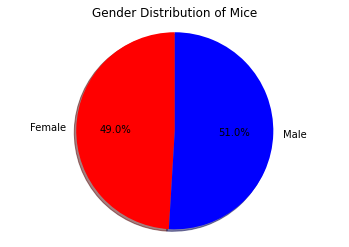

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_plot = clean_mouse_results[['Sex','Mouse ID']].groupby("Sex").count()

Counts = gender_plot['Mouse ID'].to_list()
Sex = clean_mouse_results['Sex'].unique()
colors = ["red","blue"]
explode = (0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(Counts, explode=explode, labels=Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Gender Distribution of Mice")
# print the final product to the screen
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_mouse_results[['Mouse ID', 'Timepoint']].groupby("Mouse ID").max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_vol = pd.merge(max_timepoint, clean_mouse_results,how='left', on=['Mouse ID', 'Timepoint'])

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = pd.DataFrame()
vol=[]

#Loop through each drug pulling out volumes and calculating IQR and outliers
for x in drug:
    vol= max_timepoint_vol.loc[max_timepoint_vol['Drug Regimen'] == x, ['Tumor Volume (mm3)']]
    #add new column for the drug with volumes
    tumor_vol[x] = vol['Tumor Volume (mm3)'].values

    # Calculate the IQR and quantitatively determine if there are any potential outliers. Print results for each drug
    quartiles = tumor_vol[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"{x}:")
    print(f"The lower quartile of {x} is: {lowerq}")
    print(f"The upper quartile of {x} is: {upperq}")
    print(f"The interquartile range of {x} is: {iqr}")
    print(f"The the median of {x} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    #Identify Outliers and Print them
    outliers = vol.loc[(vol['Tumor Volume (mm3)'] > upper_bound) | (vol['Tumor Volume (mm3)'] < lower_bound) , ['Tumor Volume (mm3)']]
    if len(outliers)>0:
        print(f"Outliers: {outliers}")
    else:
        print(f"No Outliers")
    print("----------------------------------------------------")

Capomulin:
The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
No Outliers
----------------------------------------------------
Ramicane:
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
No Outliers
----------------------------------------------------
Infubinol:
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Valu

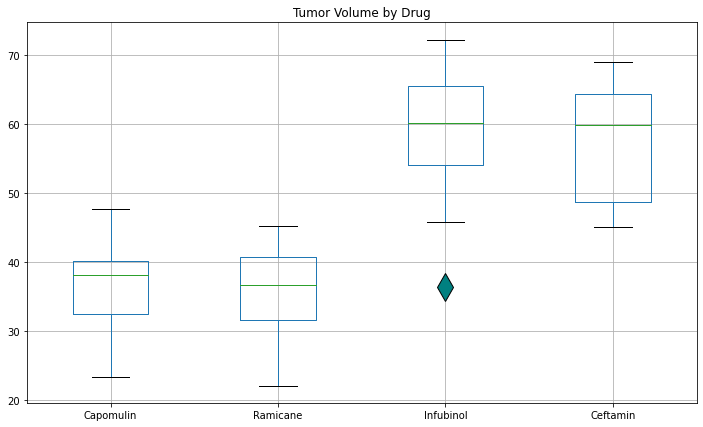

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(12, 7))
tumor_vol.boxplot(flierprops={'marker': 'd', 'markersize': 20, 'markerfacecolor': 'teal'})
ax.set_title('Tumor Volume by Drug')

plt.show()

## Line and Scatter Plots

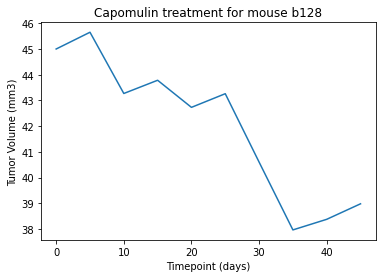

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_mouse = clean_mouse_results.loc[clean_mouse_results['Mouse ID'] == 'b128', ['Mouse ID','Tumor Volume (mm3)','Timepoint']]

# Create a graph based on b128
plt.plot(Cap_mouse['Timepoint'], Cap_mouse['Tumor Volume (mm3)'])
plt.title("Capomulin treatment for mouse b128")
plt.xlabel('Timepoint (days)')
plt.ylabel("Tumor Volume (mm3)")

# Show the graph that we have created
plt.show()

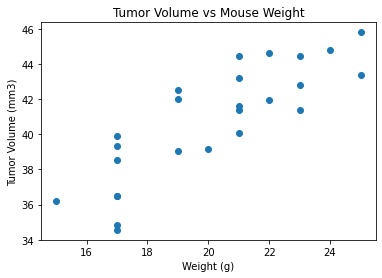

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Cap_vol_weight = clean_mouse_results.loc[clean_mouse_results['Drug Regimen'] == 'Capomulin', ['Mouse ID','Tumor Volume (mm3)','Weight (g)']]
Cap_vol_weight = Cap_vol_weight.groupby("Mouse ID").agg({"Tumor Volume (mm3)": ["mean"], "Weight (g)": ["max"]})
plt.scatter(Cap_vol_weight['Weight (g)'], Cap_vol_weight['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title("Tumor Volume vs Mouse Weight")
plt.show()



## Correlation and Regression

The correlation between both factors is 0.84


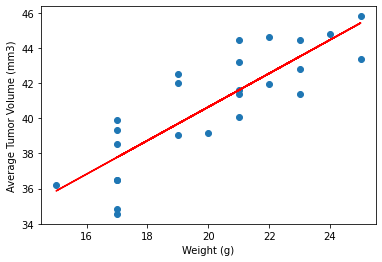

In [86]:
# Calculate the correlation coefficient
Cap_vol_weight.iloc[:,1]
weight = Cap_vol_weight.iloc[:,1]
volume = Cap_vol_weight.iloc[:,0]
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
# Calculate the linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
weight = Cap_vol_weight.iloc[:,1]
volume = Cap_vol_weight.iloc[:,0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()